## A

In [15]:
import math

def nakamoto(n, q):
    p = 1 - q
    la = n * (q / p)
    
    s = 0.0
    for k in range(0, n):
        s += math.exp(-la) * ((la ** k) / math.factorial(k)) * (1 - (q / p) ** (n - k))
    
    return 1 - s

In [21]:
import scipy.special

def grunspan(n, q):
    p = 1 - q
    
    s = 0.0
    for k in range(0, n):
        s += (p ** n * q ** k - q ** n * p ** k) * scipy.special.comb(k + n - 1, k)
    
    return 1 - s

### Ustal n = 1, 3, 6, 12, 24, 48 i przedstaw wykresy P(n, q) w zależności od wartości q

In [72]:
import numpy as np
ns = [1, 3, 6, 12, 24, 48]
q_range = np.arange(0.01, 0.49, 0.01)

In [73]:
grunspan_for_ns = {}
for n in ns:
    grunspan_for_ns[n] = []
    for q in q_range:
       grunspan_for_ns[n].append(
         (q, grunspan(n, q))
       )

nakamoto_for_ns = {}
for n in ns:
    nakamoto_for_ns[n] = []
    for q in q_range:
       nakamoto_for_ns[n].append(
         (q, nakamoto(n, q))
       )

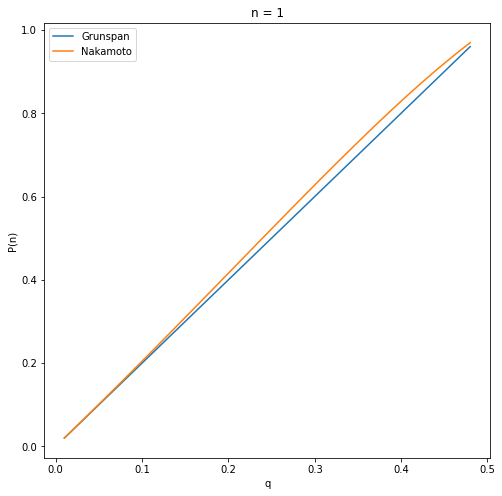

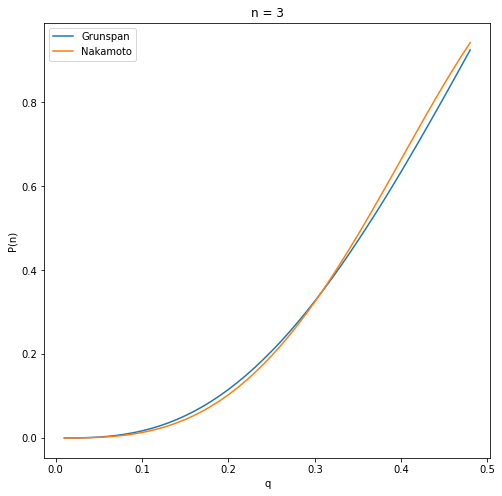

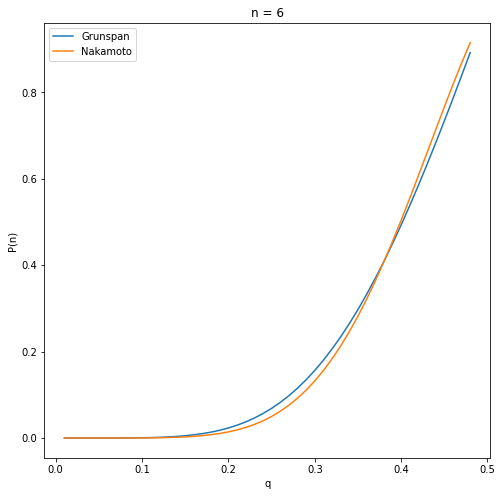

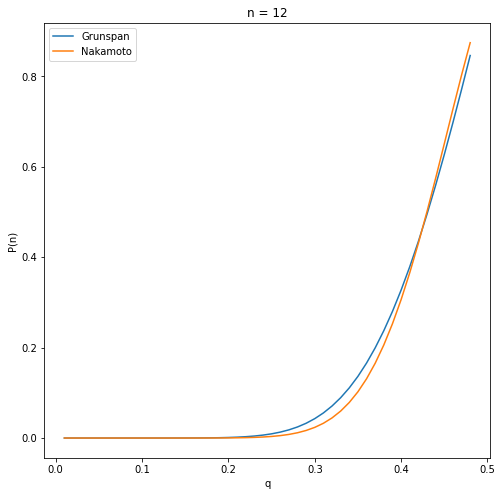

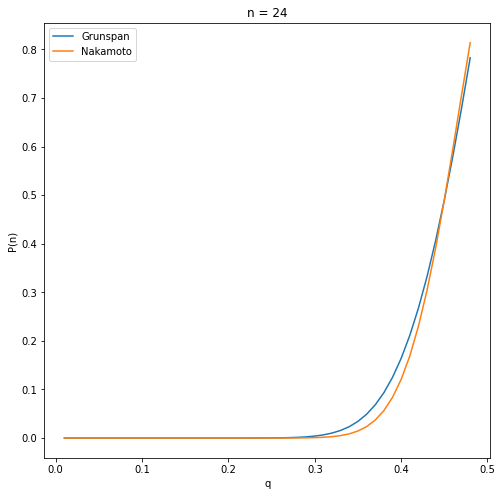

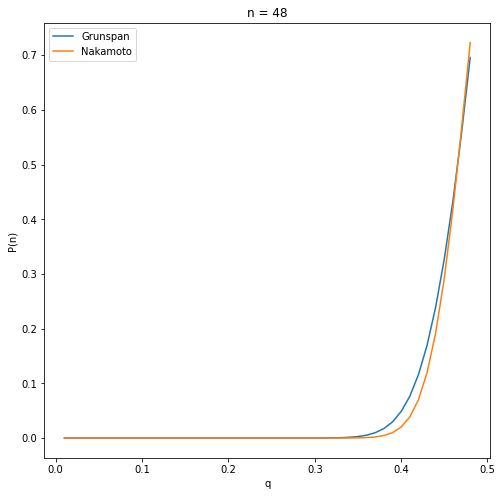

In [91]:
import matplotlib.pyplot as plt

for n in ns:
    plt.figure(1, figsize=(8, 8))
    plt.xlabel("q")
    plt.ylabel("P(n)")
    plt.title("n = " + str(n))
    x1, y1 = zip(*grunspan_for_ns[n])
    x2, y2 = zip(*nakamoto_for_ns[n])
 
    plt.plot(x1, y1, label="Grunspan")
    plt.plot(x2, y2, label="Nakamoto")
    plt.legend()
    plt.show()

### Ustal dopuszczalne prawd.sukcesu adwersarza P(n, q) = 0.1%, 1%, 10% i narysuj wykresy przedstawiające jak należy dobrać wartość n w zależności od wartości q

In [92]:
ps = [0.001, 0.01, 0.1]

def find_n(p, q, f):
    for n in range(0, 120):
        if f(n, q) <= p:
            return n

p_data_nakomoto = {}
p_data_grunspan = {}

for p in ps:
    p_data_nakomoto[p] = []
    p_data_grunspan[p] = []

    for q in q_range:
        p_data_nakomoto[p].append((q, find_n(p, q, nakamoto)))
        p_data_grunspan[p].append((q, find_n(p, q, grunspan)))
        

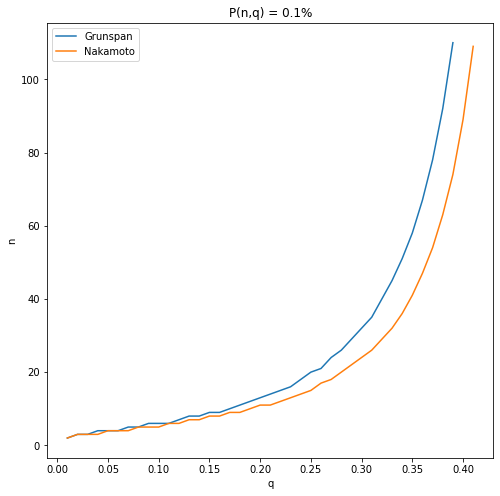

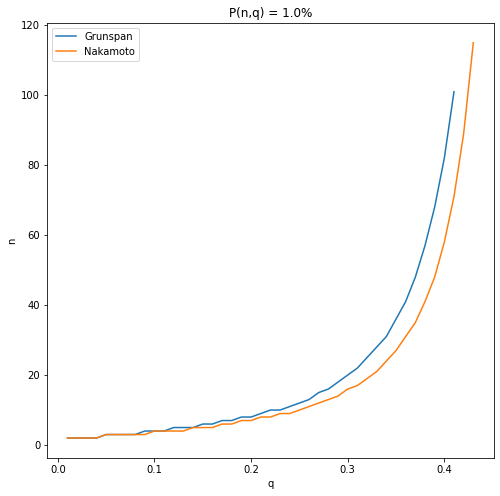

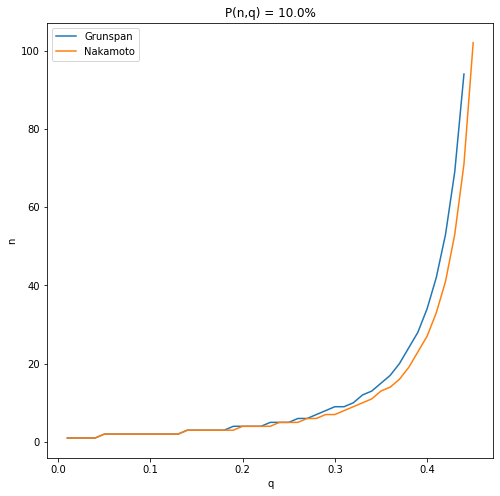

In [93]:
for p in ps:
    plt.figure(1, figsize=(8, 8))
    plt.xlabel("q")
    plt.ylabel("n")
    plt.title("P(n,q) = " + str(p * 100) + "%")
    x1, y1 = zip(*p_data_grunspan[p])
    x2, y2 = zip(*p_data_nakomoto[p])
 
    plt.plot(x1, y1, label="Grunspan")
    plt.plot(x2, y2, label="Nakamoto")
    plt.legend()
    plt.show()